In [1]:
import torch

import torchvision
import torchvision.transforms as transforms

In [2]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

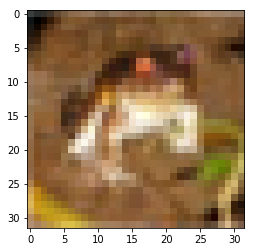

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(trainset[0][0])
plt.show()

In [4]:
def plot_images(images, cls_true, cls_pred=None):

    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    for i, ax in enumerate(axes.flat):
        # plot the image
        ax.imshow(images[i, :, :, :], interpolation='spline16')
        # get its equivalent class name
        cls_true_name = classes[cls_true[i]]
            
        if cls_pred is None:
            xlabel = "{0} ({1})".format(cls_true_name, cls_true[i])
        else:
            cls_pred_name = label_names[cls_pred[i]]
            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)
            
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

In [19]:
# This is an example for the CIFAR-10 dataset.
# There's a function for creating a train and validation iterator.
# There's also a function for creating a test iterator.
# Inspired by https://discuss.pytorch.org/t/feedback-on-pytorch-for-kaggle-competitions/2252/4

def get_train_valid_loader(data_dir,
                           batch_size,
                           augment=False,
                           random_seed=22,
                           valid_size=0.1,
                           shuffle=True,
                           show_sample=False,
                           num_workers=4,
                           pin_memory=False):
    """
    Utility function for loading and returning train and valid 
    multi-process iterators over the CIFAR-10 dataset. A sample 
    9x9 grid of the images can be optionally displayed.
    If using CUDA, num_workers should be set to 1 and pin_memory to True.
    Params
    ------
    - data_dir: path directory to the dataset.
    - batch_size: how many samples per batch to load.
    - augment: whether to apply the data augmentation scheme
      mentioned in the paper. Only applied on the train split.
    - random_seed: fix seed for reproducibility.
    - valid_size: percentage split of the training set used for
      the validation set. Should be a float in the range [0, 1].
    - shuffle: whether to shuffle the train/validation indices.
    - show_sample: plot 9x9 sample grid of the dataset.
    - num_workers: number of subprocesses to use when loading the dataset.
    - pin_memory: whether to copy tensors into CUDA pinned memory. Set it to
      True if using GPU.
    Returns
    -------
    - train_loader: training set iterator.
    - valid_loader: validation set iterator.
    """
    error_msg = "[!] valid_size should be in the range [0, 1]."
    assert ((valid_size >= 0) and (valid_size <= 1)), error_msg

    normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

    # define transforms
    valid_transform = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            normalize
        ])
    
    if augment:
        train_transform = torchvision.transforms.Compose([
            torchvision.transforms.RandomCrop(32, padding=4),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.ToTensor(),
            normalize
        ])
    else:
        train_transform = torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            normalize
        ])

    # load the dataset
    train_dataset = torchvision.datasets.CIFAR10(root=data_dir, train=True, 
                download=False, transform=train_transform)

    valid_dataset = torchvision.datasets.CIFAR10(root=data_dir, train=True, 
                download=False, transform=valid_transform)

    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    if shuffle == True:
        np.random.seed(random_seed)
        np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]

    train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
    valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(valid_idx)

    train_loader = torch.utils.data.DataLoader(train_dataset, 
                    batch_size=batch_size, sampler=train_sampler, 
                    num_workers=num_workers, pin_memory=pin_memory)

    valid_loader = torch.utils.data.DataLoader(valid_dataset, 
                    batch_size=batch_size, sampler=valid_sampler, 
                    num_workers=num_workers, pin_memory=pin_memory)


    # visualize some images
    if show_sample:
        sample_loader = torch.utils.data.DataLoader(train_dataset, 
                                                    batch_size=9, 
                                                    shuffle=shuffle, 
                                                    num_workers=num_workers,
                                                    pin_memory=pin_memory)
        data_iter = iter(sample_loader)
        images, labels = data_iter.next()
        X = images.numpy()
        X = np.transpose(X, [0, 2, 3, 1])
        plot_images(X, labels)

    return (train_loader, valid_loader)
    
def get_test_loader(data_dir, 
                    batch_size,
                    shuffle=True,
                    num_workers=4,
                    pin_memory=False):
    """
    Utility function for loading and returning a multi-process 
    test iterator over the CIFAR-10 dataset.
    If using CUDA, num_workers should be set to 1 and pin_memory to True.
    Params
    ------
    - data_dir: path directory to the dataset.
    - batch_size: how many samples per batch to load.
    - shuffle: whether to shuffle the dataset after every epoch.
    - num_workers: number of subprocesses to use when loading the dataset.
    - pin_memory: whether to copy tensors into CUDA pinned memory. Set it to
      True if using GPU.
    Returns
    -------
    - data_loader: test set iterator.
    """
    normalize = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

    # define transform
    transform = torchvision.transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])

    dataset = torchvision.datasets.CIFAR10(root=data_dir, 
                               train=False, 
                               download=False,
                               transform=transform)

    data_loader = torch.utils.data.DataLoader(dataset, 
                                              batch_size=batch_size, 
                                              shuffle=shuffle, 
                                              num_workers=num_workers,
                                              pin_memory=pin_memory)

    return data_loader

In [ ]:
def percent_correct(net, loader):
    

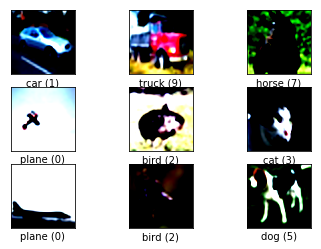

In [62]:
train_loader, validation_loader = get_train_valid_loader('/datasets/CIFAR-10',
                        100,
                        random_seed=22,
                        valid_size=0.1,
                        shuffle=True,
                        show_sample=True,
                        num_workers=4,
                        pin_memory=False)
test_loader = get_test_loader('/datasets/CIFAR-10',
                        100,
                        num_workers=4,
                        pin_memory=False)

In [66]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 100, 3,padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(100, 200, 3,padding = 1)
        self.fc1 = nn.Linear(200 * 8 * 8, 9600)
        self.fc4 = nn.Linear(9600, 4800)
        self.fc5 = nn.Linear(4800, 2400)
        self.fc6 = nn.Linear(2400, 1000)
        self.fc7 = nn.Linear(1000,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 200 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [67]:
import torch.optim as optim

net = Net()
net.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [68]:
from torch.autograd import Variable

for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 450 == 449:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 450))
            running_loss = 0.0
            correct = 0.0
            total = 0.0
            for valid_data in validation_loader:
                valid_inputs, valid_labels = valid_data
                valid_outputs = net(Variable(valid_inputs.cuda()))
                _, predicted = torch.max(valid_outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == valid_labels.cuda()).sum()

            print('Accuracy of the network on the 5000 validation images: %.2f %%' % (
                        100 * correct / total))

print('Finished Training')

[1,   450] loss: 1.807
Accuracy of the network on the 5000 validation images: 39.30 %
[2,   450] loss: 1.314
Accuracy of the network on the 5000 validation images: 57.76 %
[3,   450] loss: 1.019
Accuracy of the network on the 5000 validation images: 65.38 %
[4,   450] loss: 0.814
Accuracy of the network on the 5000 validation images: 68.48 %
[5,   450] loss: 0.639
Accuracy of the network on the 5000 validation images: 70.54 %
[6,   450] loss: 0.491
Accuracy of the network on the 5000 validation images: 71.02 %
[7,   450] loss: 0.351
Accuracy of the network on the 5000 validation images: 71.34 %
[8,   450] loss: 0.265
Accuracy of the network on the 5000 validation images: 70.58 %
[9,   450] loss: 0.191
Accuracy of the network on the 5000 validation images: 71.92 %
[10,   450] loss: 0.148
Accuracy of the network on the 5000 validation images: 70.96 %
[11,   450] loss: 0.114
Accuracy of the network on the 5000 validation images: 70.58 %
[12,   450] loss: 0.100
Accuracy of the network on t

Process Process-5262:
KeyboardInterrupt
Process Process-5264:
Process Process-5263:
Process Process-5261:
Traceback (most recent call last):
Traceback (most recent call last):


KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/opt/conda/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/opt/conda/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/opt/conda/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
    self.run()
    self.run()
    self.run()
  File "/opt/conda/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/opt/conda/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/opt/conda/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/opt/conda/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/pyt

In [61]:
correct = 0
total = 0

for data in test_loader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


In [ ]:
class Net1(nn.modulesle):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x